### Data Analysis Part

- General dataset information
- Text analysis

#### General dataset information
- number of samples
- label distribution

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
data_dir = "/Users/yikaizhu/github/workspace/kaggle/tweet-data/"
def load_csv(path):
    df = pd.read_csv(path)
    return df

df = load_csv(data_dir+"train.csv")

print("- Number of samples: {}".format(len(df)))
print("- Input data columns: {}".format(df.columns))
print("- Label distribution")
print("- - Number of positive samples: {}".format(len(df.loc[df['target'] == 1])))
print("- - Number of negative samples: {}".format(len(df.loc[df['target'] == 0])))
print("- - Plot of Label distribution")
x=df.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('sample numbers')

- Number of samples: 7613
- Input data columns: Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
- Label distribution
- - Number of positive samples: 3271
- - Number of negative samples: 4342
- - Plot of Label distribution


Text(0, 0.5, 'sample numbers')

#### text analysis(general part)
- number of characters in each tweet
- number of words in each tweet
- average word length in each tweet
- word distribution

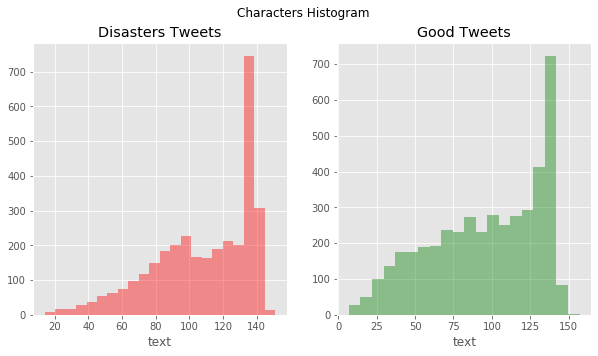

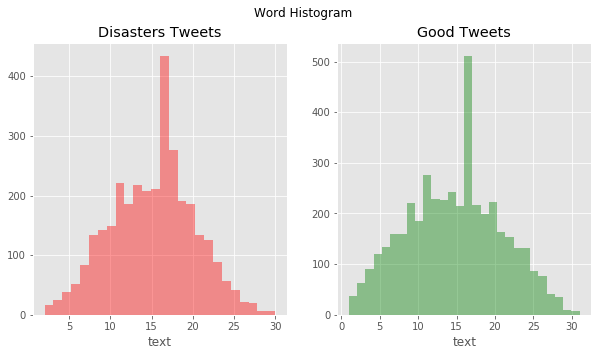

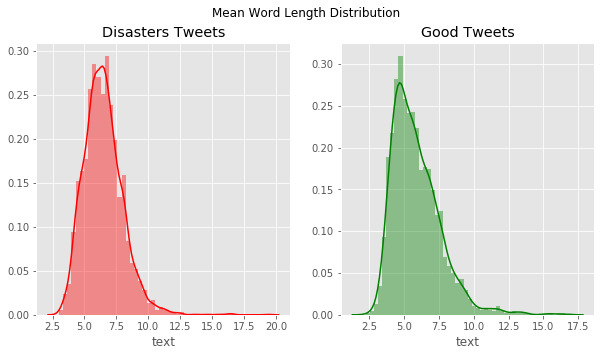

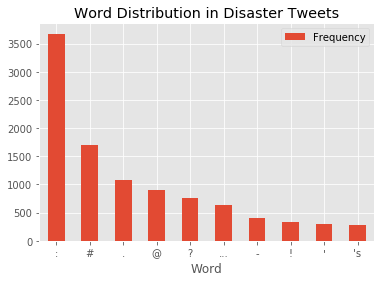

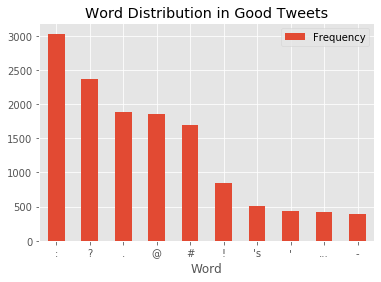

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop=set(stopwords.words('english'))
stop = set(list(stop) + ["http","https", "s", "nt", "m"])

# # 利用 plt 绘制直方图
# def plot_hist(to_plot, suptitle):
#     fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
#     df_len = to_plot[0]
#     ax1.hist(df_len,color='red')
#     ax1.set_title('Disasters Tweets')
#     df_len = to_plot[1]
#     ax2.hist(df_len,color='green')
#     ax2.set_title('Good Tweets')
#     fig.suptitle(suptitle)
#     plt.show()
#     plt.close()

# 利用 sns 绘制概率分布图
def plot_hist(to_plot, suptitle, hist=True, kde=True):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
    sns.distplot(to_plot[0],color="red",ax=ax1,hist=hist,kde=kde)
    ax1.set_title('Disasters Tweets')
    sns.distplot(to_plot[1],color="green",ax=ax2,hist=hist,kde=kde)
    ax2.set_title('Good Tweets')
    fig.suptitle(suptitle)
    plt.show()
    plt.close()

# number of characters in each tweet
to_plot = [
    df[df["target"] == 1]["text"].str.len(),
    df[df["target"] == 0]["text"].str.len()
]
plot_hist(to_plot, "Characters Histogram", kde=False)

# number of words in each tweet
to_plot = [
    df[df["target"] == 1]["text"].str.split().map(lambda x: len(x)),
    df[df["target"] == 0]["text"].str.split().map(lambda x: len(x))
]
plot_hist(to_plot, "Word Histogram", kde=False)

# average word length in each tweet
to_plot = [
    df[df["target"] == 1]["text"].str.split().apply(lambda x: np.mean([len(_) for _ in x])),
    df[df["target"] == 0]["text"].str.split().apply(lambda x: np.mean([len(_) for _ in x]))
]
plot_hist(to_plot, "Mean Word Length Distribution")

# word distribution
top_N = 10
def show_word_distrib(df, target=1, field="text", title="", if_print=False):
    txt = df[df['target']==target][field].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
    words = word_tokenize(txt)
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stop) 
    rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                        columns=['Word', 'Frequency']).set_index('Word')
    if if_print:
        print(rslt)
    rslt.plot.bar(rot=0)
    plt.title(title)

show_word_distrib(df, target=1, field="text", title="Word Distribution in Disaster Tweets", if_print=False)
show_word_distrib(df, target=0, field="text", title="Word Distribution in Good Tweets", if_print=False)

#### text analysis(special part)
- hashtag analysis
- key word and location analysis

number of tweets with hashtag: 1743
            Frequency
Word                 
,                 784
news               56
hiroshima          22
earthquake         19
hot                13
prebreak           13
best               13
japan              11
india              10
yyc                10
            Frequency
Word                 
,                 803
nowplaying         21
news               20
hot                18
prebreak           17
best               17
gbbo               14
jobs               14
islam              14
job                12


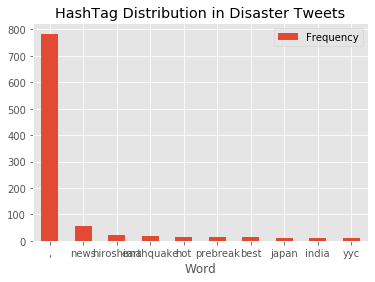

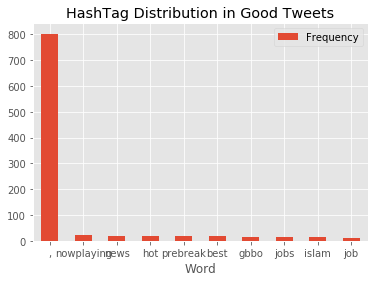

In [10]:
import re

# hashtag analysis
def text2hashtag(text):
    return ", ".join([match[1:] for match in re.findall(r"#\w+", text)]) or None

def add_hashtag(df):
    df["hashtag"] = df["text"].apply(lambda x: text2hashtag(x))
    df['hashtag'].fillna(value="NoHashTag", inplace=True)
    return df
df = add_hashtag(df)
number_tweet_with_hashtag = sum([1 if hashtag != "NoHashTag" else 0 for hashtag in df.hashtag.values])
print("number of tweets with hashtag: {}".format(number_tweet_with_hashtag))
show_word_distrib(df[df["hashtag"] != "NoHashTag"], target=1, field="hashtag", title="HashTag Distribution in Disaster Tweets", if_print=True)
show_word_distrib(df[df["hashtag"] != "NoHashTag"], target=0, field="hashtag", title="HashTag Distribution in Good Tweets", if_print=True)



In [11]:
# key word analysis
keyword_set = {w for w in df.keyword.values if isinstance(w, str)}
print("number of unique keyword: %d" % len(keyword_set))
number_no_keyword = len(df[df["keyword"].isna()])
print("%d tweets have keyword, while %d tweets have no keyword" % (len(df)-number_no_keyword, number_no_keyword))

disaster_keywords = df[df.target == 1].keyword.value_counts()
regular_keywords = df[df.target == 0].keyword.value_counts()
all_keywords = df.keyword.value_counts()

for keyword, _ in sorted(all_keywords.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("> KW: {}".format(keyword))
    print("-- # in negative tweets: {}".format(disaster_keywords.get(keyword, 0)))
    print("-- # in positive tweets: {}".format(regular_keywords.get(keyword, 0)))
    print('--------')

number of unique keyword: 221
7552 tweets have keyword, while 61 tweets have no keyword
> KW: fatalities
-- # in negative tweets: 26
-- # in positive tweets: 19
--------
> KW: armageddon
-- # in negative tweets: 5
-- # in positive tweets: 37
--------
> KW: deluge
-- # in negative tweets: 6
-- # in positive tweets: 36
--------
> KW: body%20bags
-- # in negative tweets: 1
-- # in positive tweets: 40
--------
> KW: damage
-- # in negative tweets: 19
-- # in positive tweets: 22
--------
> KW: sinking
-- # in negative tweets: 8
-- # in positive tweets: 33
--------
> KW: harm
-- # in negative tweets: 4
-- # in positive tweets: 37
--------
> KW: fear
-- # in negative tweets: 5
-- # in positive tweets: 35
--------
> KW: evacuate
-- # in negative tweets: 25
-- # in positive tweets: 15
--------
> KW: outbreak
-- # in negative tweets: 39
-- # in positive tweets: 1
--------


In [12]:
# location analysis
location_set = {w for w in df.location.values if isinstance(w, str)}
print("number of unique location: %d" % len(location_set))
number_no_location = len(df[df["location"].isna()])
print("%d tweets have location, while %d tweets have no location" % (len(df)-number_no_location, number_no_location))

disaster_location = df[df.target == 1].location.value_counts()
regular_location = df[df.target == 0].location.value_counts()
all_location = df.location.value_counts()

for location, _ in sorted(all_location.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("> LOC: {}".format(location))
    print("-- # in negative tweets: {}".format(disaster_location.get(location, 0)))
    print("-- # in positive tweets: {}".format(regular_location.get(location, 0)))
    print('--------')

number of unique location: 3341
5080 tweets have location, while 2533 tweets have no location
> LOC: USA
-- # in negative tweets: 67
-- # in positive tweets: 37
--------
> LOC: New York
-- # in negative tweets: 16
-- # in positive tweets: 55
--------
> LOC: United States
-- # in negative tweets: 27
-- # in positive tweets: 23
--------
> LOC: London
-- # in negative tweets: 16
-- # in positive tweets: 29
--------
> LOC: Canada
-- # in negative tweets: 13
-- # in positive tweets: 16
--------
> LOC: Nigeria
-- # in negative tweets: 22
-- # in positive tweets: 6
--------
> LOC: UK
-- # in negative tweets: 16
-- # in positive tweets: 11
--------
> LOC: Los Angeles, CA
-- # in negative tweets: 8
-- # in positive tweets: 18
--------
> LOC: India
-- # in negative tweets: 20
-- # in positive tweets: 4
--------
> LOC: Mumbai
-- # in negative tweets: 19
-- # in positive tweets: 3
--------


#### Data Cleaning
- remove stopwords
- remove url
- remove html
- remove emoji
- remove punct

        Frequency
Word             
like          253
amp           209
new           168
get           163
one           130
body          113
would         105
via            99
video          96
people         95
            Frequency
Word                 
fire              180
news              140
amp               135
via               121
disaster          119
california        115
suicide           110
police            107
people            105
killed             93


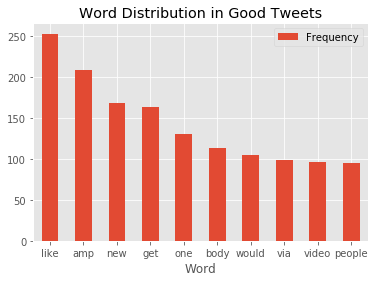

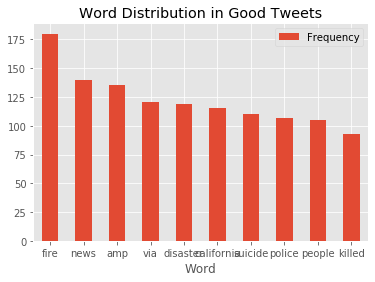

In [14]:
import string
def remove_stopwords(text):
    if text is not None:
        tokens = [x for x in word_tokenize(text) if x not in stop]
        return " ".join(tokens)
    else:
        return None
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub('', text)
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

def clean_df(df, field="text"):
    df[field] = df[field].apply(lambda x : x.lower())
    df[field] = df[field].apply(lambda x : remove_stopwords(x))
    df[field] = df[field].apply(lambda x : remove_URL(x))
    df[field] = df[field].apply(lambda x : remove_html(x))
    df[field] = df[field].apply(lambda x : remove_emoji(x))
    df[field] = df[field].apply(lambda x : remove_punct(x))
    return df

df = clean_df(df)
show_word_distrib(df, target=0, field="text", title="Word Distribution in Good Tweets", if_print=True)
show_word_distrib(df, target=1, field="text", title="Word Distribution in Good Tweets", if_print=True)



### Model

In [20]:
from sklearn.preprocessing import LabelEncoder
# override
data_dir = "/Users/yikaizhu/github/workspace/kaggle/tweet-data/"
def load_csv(path):
    df = pd.read_csv(path)
    df = add_hashtag(df)
    df = clean_df(df)
    return df

train_df = load_csv(data_dir + "train.csv")
test_df = load_csv(data_dir + "test.csv")

def dump_preds(df, preds, output_path):
    ans_df = df[['id']]
    ans_df['target'] = None
    for i, p in enumerate(preds):
        ans_df.loc[i, 'target'] = p
    ans_df.to_csv(output_path, index=False)

le = LabelEncoder()
def split_data(df, if_test=True):
    X = df.text
    if not if_test:
        Y = df.target
        Y = le.fit_transform(Y)
        Y = Y.reshape(-1, 1)
        return X, Y
    return X

train_X, train_Y = split_data(df, if_test=False)
test_X = split_data(df)

#### Baseline Models(Stupid Models)
- Majority Model
- TFIDF + LogReg

these models can be used to check the problem hardness

In [53]:
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

def test_majority_model(X):
    n = len(X)
    preds = [1 for _ in range(n)]
    return preds

# X: Series, Y: numpy array with shape(n, 1)
def tfidf_logreg(X, Y):
    X, Y = train_X, train_Y
    x_train, x_validation, y_train, y_validation = \
        model_selection.train_test_split(X.values, Y, test_size=0.2, random_state=7)
    tfidf_vectorizer = TfidfVectorizer(
        analyzer='word',
        tokenizer=lambda x: x,
        preprocessor=lambda x: x,
        token_pattern=None)

    
        
    

In [54]:
zyk = tfidf_vectorizer.fit_transform(train_X)

<1x64 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>